# Custom ML Package Demonstration

This notebook demonstrates the usage of our custom machine learning package (`ml_package`) on the Breast Cancer dataset.

In [ ]:
import sys
from pathlib import Path

# Add project root using a relative path
NOTEBOOK_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
PROJECT_ROOT = NOTEBOOK_DIR.parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import custom package
from ml_package import KNNClassifier, DecisionTreeClassifier

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load and Prepare Data

In [4]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"\nTarget distribution:")
print(f"Malignant (0): {np.sum(y == 0)}")
print(f"Benign (1): {np.sum(y == 1)}")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569

Target distribution:
Malignant (0): 212
Benign (1): 357


In [ ]:
# Scale features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

Training samples: 455
Test samples: 114


## 1. K-Nearest Neighbors Classifier

### Hyperparameter Tuning: Finding Optimal k

k= 3: Accuracy = 0.9825
k= 5: Accuracy = 0.9649
k= 7: Accuracy = 0.9649
k= 9: Accuracy = 0.9737
k=11: Accuracy = 0.9737
k=15: Accuracy = 0.9649


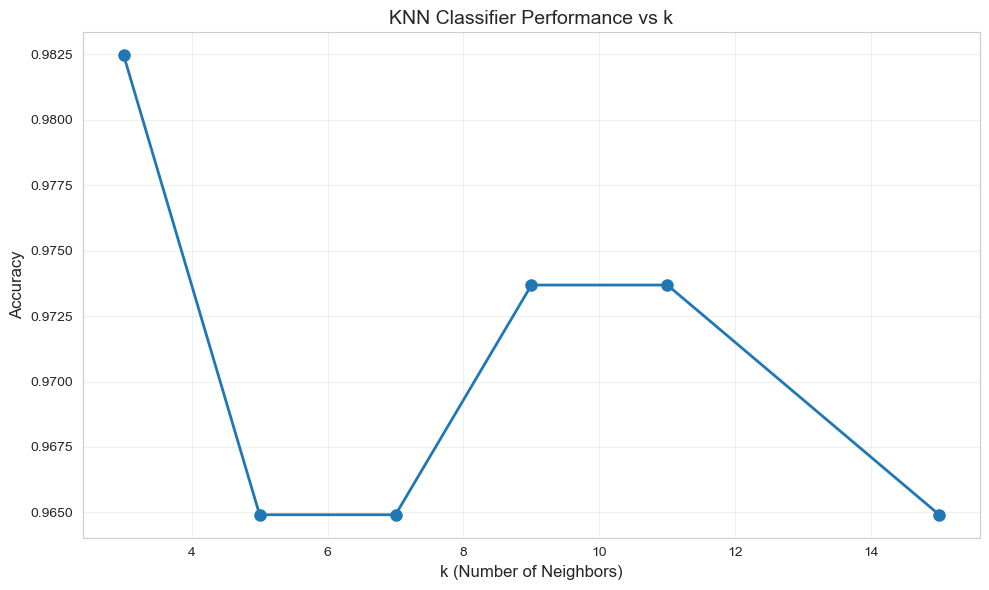


Best k: 3 with accuracy: 0.9825


In [6]:
# Test different k values
k_values = [3, 5, 7, 9, 11, 15]
knn_scores = []

for k in k_values:
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    knn_scores.append(score)
    print(f"k={k:2d}: Accuracy = {score:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('k (Number of Neighbors)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN Classifier Performance vs k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Best k
best_k = k_values[np.argmax(knn_scores)]
print(f"\nBest k: {best_k} with accuracy: {max(knn_scores):.4f}")

### Evaluation with Best k

KNN Classifier Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

   Malignant       1.00      0.95      0.98        42
      Benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



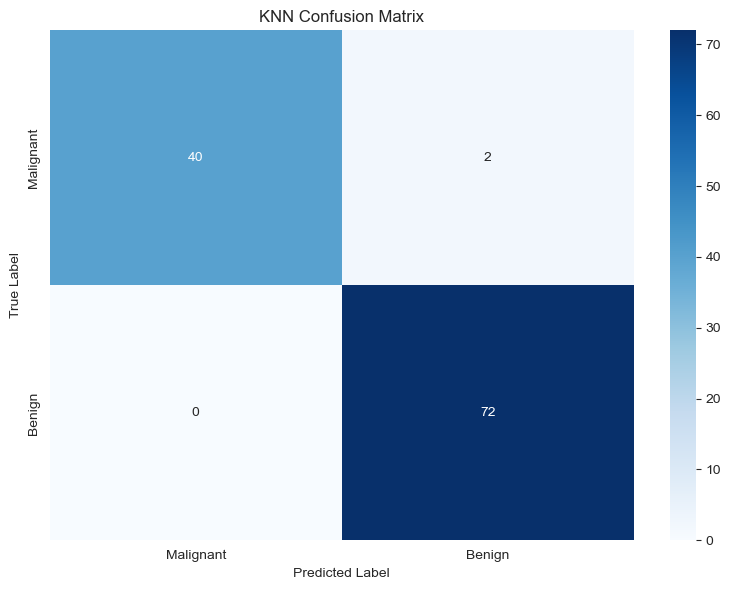

In [7]:
# Train with best k and evaluate
knn = KNNClassifier(k=best_k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print(f"KNN Classifier Accuracy: {knn_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred, target_names=['Malignant', 'Benign']))

# Confusion matrix
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('KNN Confusion Matrix')
plt.tight_layout()
plt.show()

## 2. Decision Tree Classifier

### Hyperparameter Tuning: Finding Optimal max_depth

max_depth= 3: Accuracy = 0.9386
max_depth= 5: Accuracy = 0.9298
max_depth= 7: Accuracy = 0.9298
max_depth=10: Accuracy = 0.9298
max_depth=15: Accuracy = 0.9298
max_depth=20: Accuracy = 0.9298


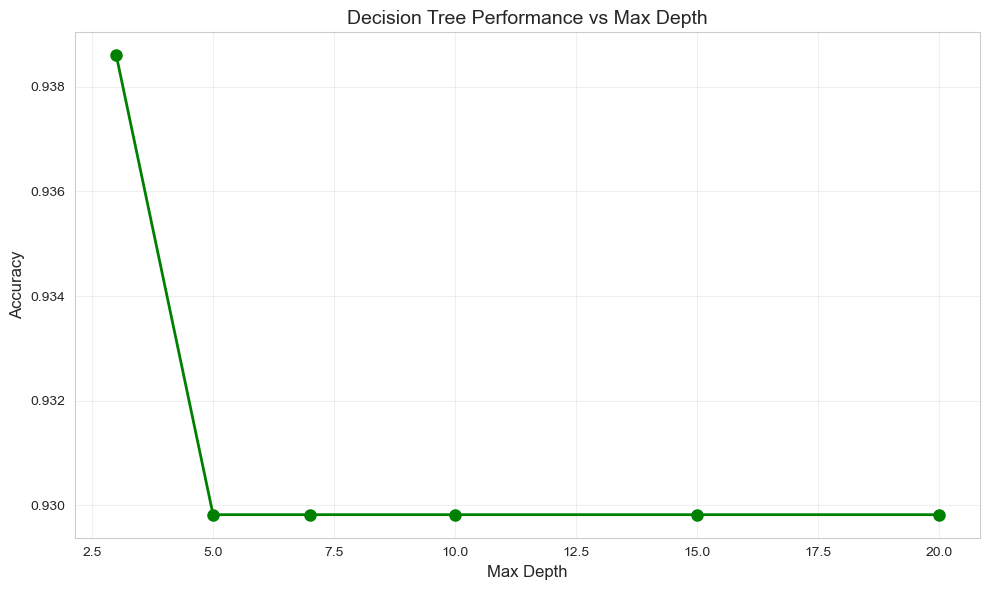


Best max_depth: 3 with accuracy: 0.9386


In [8]:
# Test different max_depth values
depths = [3, 5, 7, 10, 15, 20]
dt_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=2)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    dt_scores.append(score)
    print(f"max_depth={depth:2d}: Accuracy = {score:.4f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(depths, dt_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Max Depth', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Decision Tree Performance vs Max Depth', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Best depth
best_depth = depths[np.argmax(dt_scores)]
print(f"\nBest max_depth: {best_depth} with accuracy: {max(dt_scores):.4f}")

### Evaluation with Best max_depth

Decision Tree Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

   Malignant       0.91      0.93      0.92        42
      Benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



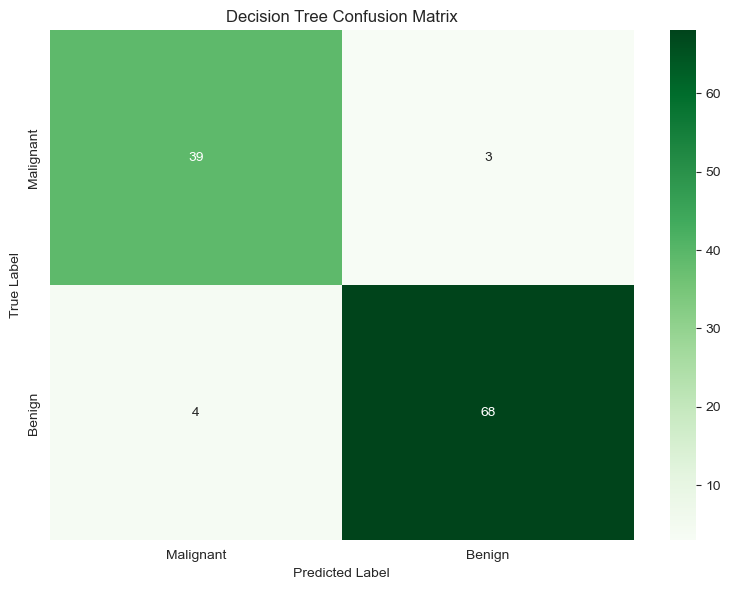

In [9]:
# Train with best depth and evaluate
dt = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=2)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, dt_pred, target_names=['Malignant', 'Benign']))

# Confusion matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()

## 3. Model Comparison

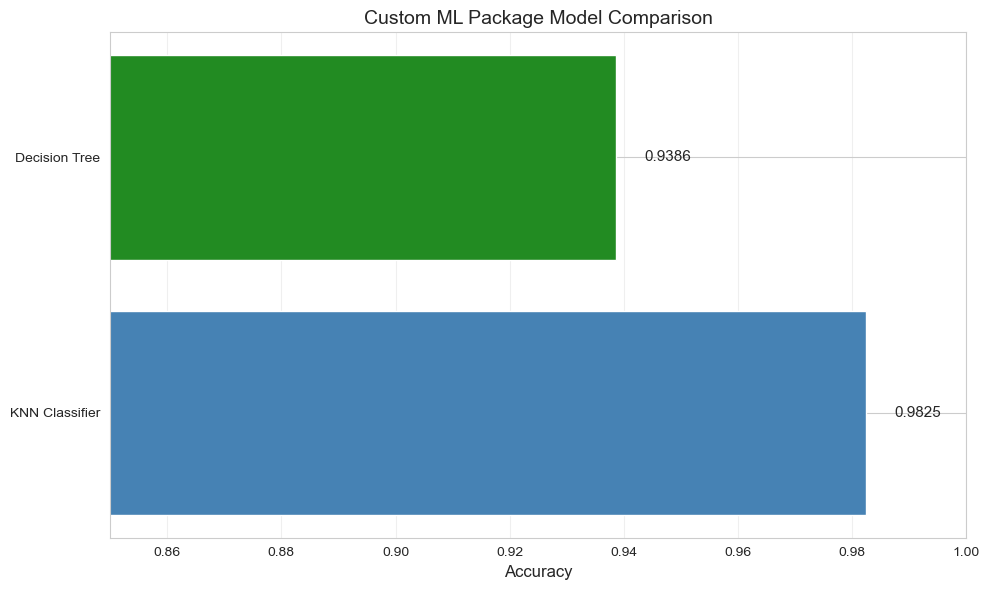


Model Performance Summary:
KNN Classifier      : 0.9825
Decision Tree       : 0.9386


In [10]:
# Compare both models
results = {
    'KNN Classifier': knn_acc,
    'Decision Tree': dt_acc
}

# Plot comparison
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=['steelblue', 'forestgreen'])
plt.xlabel('Accuracy', fontsize=12)
plt.title('Custom ML Package Model Comparison', fontsize=14)
plt.xlim([0.85, 1.0])
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(acc + 0.005, i, f'{acc:.4f}', va='center', fontsize=11)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nModel Performance Summary:")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model:20s}: {acc:.4f}")

## Summary

This notebook demonstrated:
- Usage of our custom KNN Classifier
- Usage of our custom Decision Tree Classifier
- Hyperparameter tuning (k for KNN, max_depth for Decision Tree)
- Model evaluation with accuracy, classification reports, and confusion matrices

For more details about each algorithm, see:
- `ml_package/knn.md` - KNN algorithm documentation
- `ml_package/decision_tree.md` - Decision Tree algorithm documentation